In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv("TSLA.csv")

# **■ Section A – Exploratory Data Analysis EDA**

In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


# Question 01
*1. Show the trend of Closing Price over the years.*

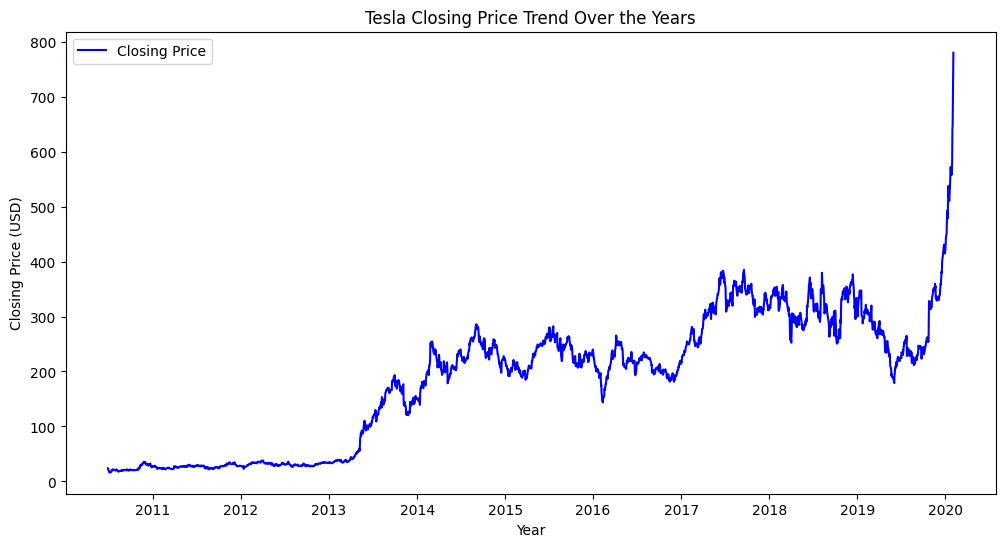

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Closing Price", color="blue")
plt.xlabel("Year")
plt.ylabel("Closing Price (USD)")
plt.title("Tesla Closing Price Trend Over the Years")
plt.legend()
plt.show()

# Question 02

  *2. Find and visualize the correlation between Open, High, Low, and Close.*

           Open      High       Low     Close
Open   1.000000  0.999425  0.999575  0.998886
High   0.999425  1.000000  0.999389  0.999640
Low    0.999575  0.999389  1.000000  0.999447
Close  0.998886  0.999640  0.999447  1.000000


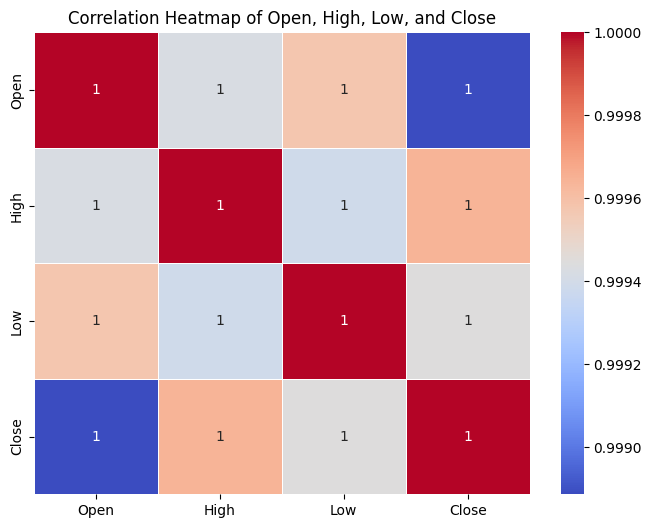

In [18]:
correlation = df[["Open" , "High" , "Low" , "Close"]].corr()

print(correlation)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Open, High, Low, and Close")
plt.show()

# Question 03

*3. Identify the highest and lowest trading volume days and discuss what it might mean for investors.*

In [21]:
# Highest trading volume day
highest_volume_day = df.loc[df["Volume"].idxmax()]

# Lowest trading volume day
lowest_volume_day = df.loc[df["Volume"].idxmin()]

print("Highest Volume Day:")
print(highest_volume_day)

print("\nLowest Volume Day:")
print(lowest_volume_day)



Highest Volume Day:
Date         2020-02-03 00:00:00
Open                  673.690002
High                  786.140015
Low                    673.52002
Close                      780.0
Adj Close                  780.0
Volume                  47065000
Name: 2415, dtype: object

Lowest Volume Day:
Date         2010-10-25 00:00:00
Open                   20.940001
High                       20.98
Low                        20.73
Close                      20.85
Adj Close                  20.85
Volume                    118500
Name: 82, dtype: object


# Question 04

*4. Plot the distribution of Closing Prices.*

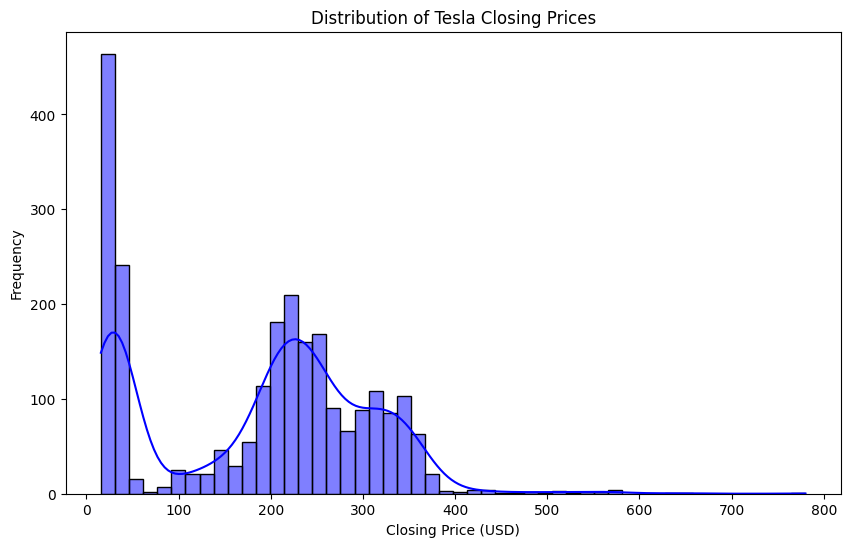

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df["Close"], bins=50, kde=True, color="blue")
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Tesla Closing Prices")
plt.show()

# Question 05

*5. Report any missing values or anomalies and suggest how to handle them.*

In [35]:
df.isnull().sum()
print(f"There are `{df.isnull().sum().sum()}` missing values in the dataset")

# Check number of duplicated rows:
duplicates = df.duplicated().sum()
print(f"There are `{duplicates.sum()}` duplicated rows in the dataset")



There are `0` missing values in the dataset
There are `0` duplicated rows in the dataset


# **■ Section B – Linear Regression**

# Question 01

*1. Build a Linear Regression model using Open, High, Low, and Volume as predictors.*

In [36]:
X = df[["Open", "High", "Low", "Volume"]]   # features
y = df["Close"] # target

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

# Question 02

*2. Evaluate the model using MAE, RMSE, and R2 score.*

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred) # R² Score

print("Mean Absolute Error (MAE):", np.round(mae, 1))
print("Root Mean Squared Error (RMSE):", np.round(rmse, 1))
print("R² Score:", r2)

Mean Absolute Error (MAE): 1.3
Root Mean Squared Error (RMSE): 2.1
R² Score: 0.9997117604197432


# Question 03

*3. Explain which feature contributes the most to predicting the Closing Price.*

In [52]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coefficients)

# Find the feature with the highest absolute coefficient
max_feature = coefficients.loc[coefficients["Coefficient"].abs().idxmax(), "Feature"]

print(f'''Among all features, the `{max_feature + " feature"}` contributes the most to predicting the Closing Price, followed by the Low price. Open has a smaller negative effect, while Volume shows almost no contribution. This makes sense because Closing Price is naturally more related to High and Low values within the trading day, rather than the traded volume''')

  Feature   Coefficient
0    Open -6.450218e-01
1    High  9.221136e-01
2     Low  7.215048e-01
3  Volume -3.534292e-08
Among all features, the `High feature` contributes the most to predicting the Closing Price, followed by the Low price. Open has a smaller negative effect, while Volume shows almost no contribution. This makes sense because Closing Price is naturally more related to High and Low values within the trading day, rather than the traded volume


# **Section C – Logistic Regression**

# Question 01

**1. Create a new variable Price_Up:**

*• 1 if next day’s Closing Price is higher than today’s.*

*• 0 otherwise.*

In [55]:
# Shift the 'Close' column by -1 to get next day's price
df['Next_Close'] = df['Close'].shift(-1)

# Create Price_Up variable
df['Price_Up'] = (df['Next_Close'] > df['Close']).astype(int)

print(df[['Close', 'Next_Close', 'Price_Up']].head(10))

df = df.dropna(subset=['Next_Close'])

       Close  Next_Close  Price_Up
0  23.889999   23.830000         0
1  23.830000   21.959999         0
2  21.959999   19.200001         0
3  19.200001   16.110001         0
4  16.110001   15.800000         0
5  15.800000   17.459999         1
6  17.459999   17.400000         0
7  17.400000   17.049999         0
8  17.049999   18.139999         1
9  18.139999   19.840000         1


# Question 02

*2. Build a Logistic Regression model to predict Price_Up. (10 marks)*

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features (independent variables)
X = df[["Open", "High", "Low", "Volume"]]

# Target (dependent variable)
y = df["Price_Up"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.51
Confusion Matrix:
 [[  0 236]
 [  0 247]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
           1       0.51      1.00      0.68       247

    accuracy                           0.51       483
   macro avg       0.26      0.50      0.34       483
weighted avg       0.26      0.51      0.35       483



# Question 03

*3. Evaluate the model using Accuracy, Confusion Matrix, Precision, Recall, and F1-score.*

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", np.round(accuracy , 2))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 3. Precision, Recall, F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.51
Confusion Matrix:
 [[  0 236]
 [  0 247]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
           1       0.51      1.00      0.68       247

    accuracy                           0.51       483
   macro avg       0.26      0.50      0.34       483
weighted avg       0.26      0.51      0.35       483

